In [65]:
import graphviz
import pygit2
from typeguard import typechecked

In [66]:
@typechecked
def show(repo_path: str) -> graphviz.Digraph:
    """Creates a Graphviz graph of a Git repository."""
    repo = pygit2.Repository(repo_path)
    commits = set()
    graph = graphviz.Digraph()
    
    @typechecked
    def visit(commit: pygit2.Commit) -> None:
        if commit in commits:
            return
        commits.add(commit)
        short_hash = commit.hex[:7]
        short_message = commit.message.split('\n\n')[0]
        graph.node(commit.hex, label=f'{short_hash}\n{short_message}', shape='plain', fontname='Segoe UI', fontsize='12')
    
    visit(repo[repo.head.target])
    
    for child in repo.walk(repo.head.target):
        for parent in child.parents:
            visit(parent)
            graph.edge(parent.hex, child.hex)
    
    return graph

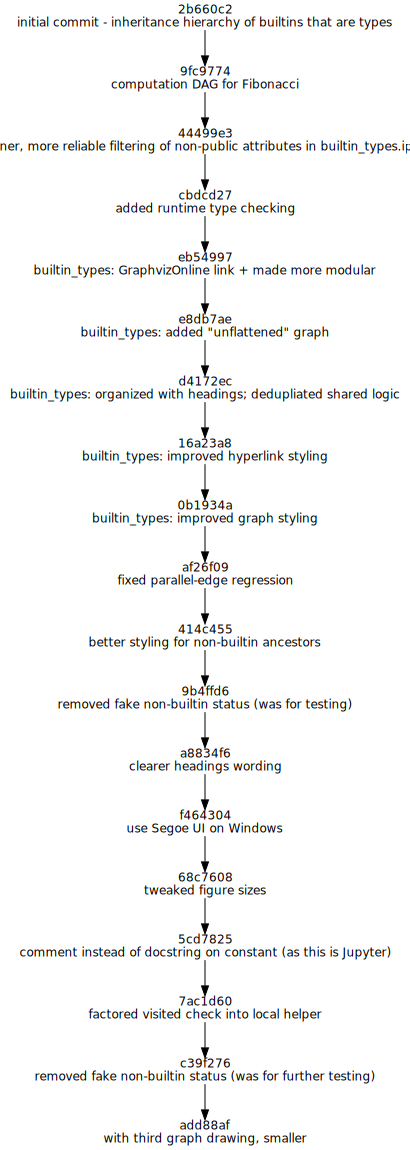

In [67]:
show('.')

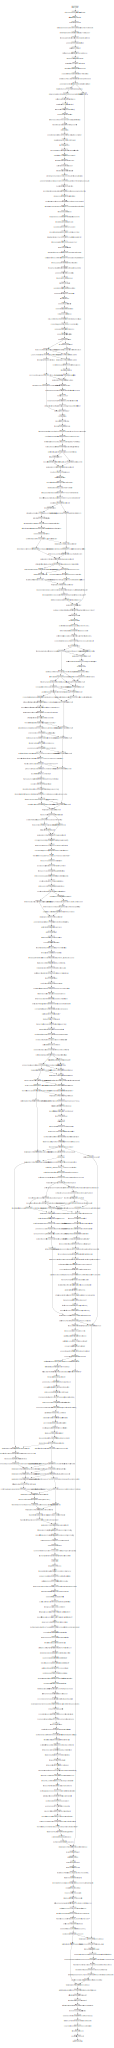

In [68]:
show('../Flood')